<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/OUTLIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [38]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [40]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


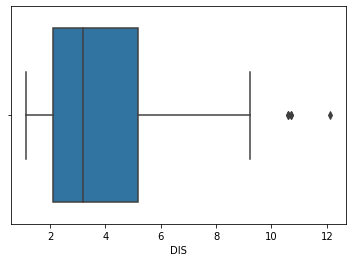

In [41]:
# vamos a empezar a ver los valores atípicos con gráficos. 
# todo lo que esté fuera de la caja se representará con puntos, y serán los atípicos. 
import seaborn as sns
sns.boxplot(x = boston_df["DIS"])
# vemos debajo tres puntos de 10 a 12 que son valores atípicos. 

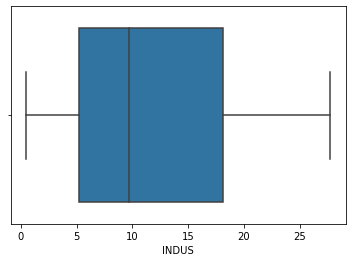

In [43]:
# vamos a empezar a ver los valores atípicos con gráficos. 
# todo lo que esté fuera de la caja se representará con puntos, y serán los atípicos. 
import seaborn as sns
sns.boxplot(x = boston_df["INDUS"])
# ete no tiene atípicos

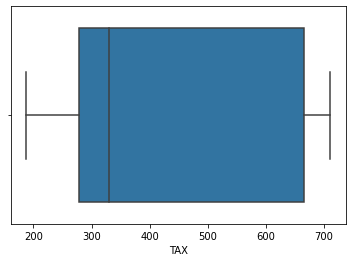

In [44]:
# vamos a empezar a ver los valores atípicos con gráficos. 
# todo lo que esté fuera de la caja se representará con puntos, y serán los atípicos. 
import seaborn as sns
sns.boxplot(x = boston_df["TAX"])
# este no tiene atípicos. 

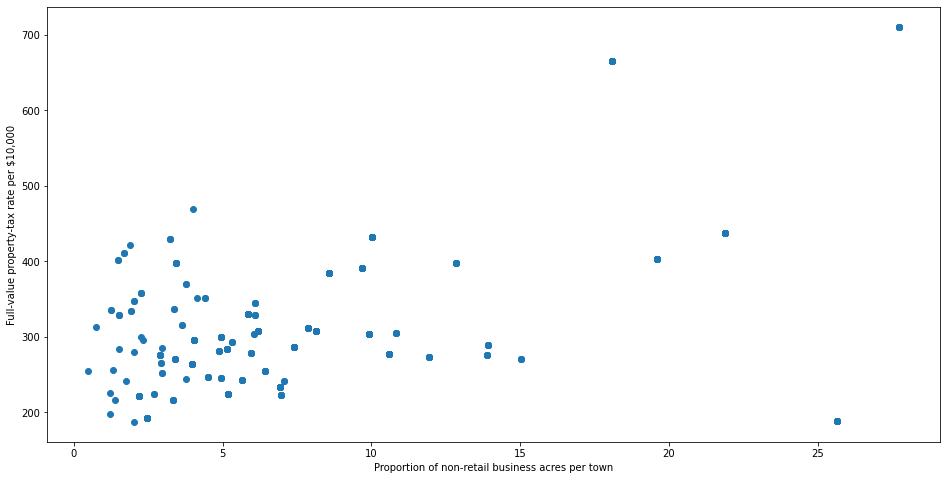

In [46]:
# otra forma de verlo. con un diagrama de dispersión. en este caso tenemos dos variables, una en el eje x y otra en el y
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()
# como podemos ver debajo la mayoría de los puntos se encuentran en la parte inferior izd, pero tenemos alguno que separán del resto. 

In [47]:
# LA FUNCIÓN Z-SCORE.

# con esto vemos los valores que están por encima del valor medio lo que se está observando o midiendo. 
# lo que busca la funcion es una distribución donde la media es 0 y la desviación estandar es 1, es decir una distribución normal. 
# todos aquellos que están muy lejos de 0 se consideran atípicos. normalmente se le fija el umbral de 3 o -3 respectivamente. 

In [48]:
from scipy import stats
import numpy as np

z =np.abs(stats.zscore(boston_df))
print(z)

# viendo lo de debajo es dificil decidir que valores son atípicos. 

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [49]:
# fijamos un umbral
thereshold = 3
print(np.where (z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [ ]:
# explicación de lo de arriba. 
# la primera matríz representa los numeros de fila. 
# la segunda los numeros de la columnas. 
# lo que quiere decir que la fila 55 de la columna 1 tiene una puntuación Z superior a 3 y por lo tanto es un valor atípico. 

In [50]:
print(z[55][1])

3.375038763517309


In [ ]:
# PUNTUACION (IQR)
# es el rango intercuartilico entre el 25 y el 75.
# en otras palabras el IQR es el primer cuartil restado del tercer cuartil. 
# IQR es algo similar a Z-score en terminos de encontrar la distribución de datos y luego mantener algún umbral para identifical el valor atípico
# vamos a ver como se hace 

In [51]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# aui obtenemos el IQR para cada columna.

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [52]:
# los valores false son normales y los true son atípicos. 
print(boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

TypeError: ignored

In [54]:
boston_df = boston_df[(z < 3).all(axis=1)]
# en teoría con esto hemos eliminado los valores atípicos con la puntuación Z

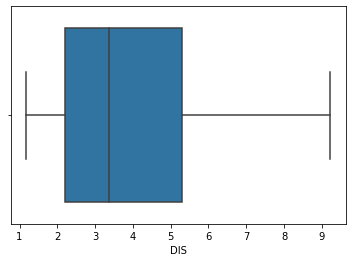

In [55]:
# vamos a empezar a ver los valores atípicos con gráficos. 
# todo lo que esté fuera de la caja se representará con puntos, y serán los atípicos. 
import seaborn as sns
sns.boxplot(x = boston_df["DIS"])
# vemos debajo tres puntos de 10 a 12 que son valores atípicos.

# podemos ver que si ha eliminado los atípicos de DIS. 